In [1]:
import numpy as np
import matplotlib.pyplot as plt
from algorithms import *
from gridworld import GridWorld
ALG_NAMES = ['Sarsa',
             'Q-learning',
             'Sarsa-lambda',
             'Q-lambda']

In [2]:
def plot_step_per_ep(episodes1, label1=None, episodes2=None, label2=None, episodes3=None, label3=None, title=None):
    step1 = []
    for ep in episodes1:
        step1.append(len(ep))    
    plt.xlabel('Episode')
    plt.ylabel('Number of steps')
    if title is not None:
        plt.title(title)
    plt.plot(step1, label = label1)
    if episodes2 is not None:
        step2 = []
        for ep in episodes2:
            step2.append(len(ep))
        plt.plot(step2, label = label2)
    if episodes3 is not None:
        step3 = []
        for ep in episodes3:
            step3.append(len(ep))
        plt.plot(step3, label = label3)   
    plt.legend()

# Regular Gridworld

## Sarsa

In [3]:
env = GridWorld(stochastic_wind=False, print_board=False)
algorithm = ALG_NAMES[0]
num_episodes = 800
alpha = 0.5
epsilon = 0.1
gamma = 1
lam = 0.5

In [4]:
rl1 = Sarsa(env=env, alpha=0.1, epsilon=epsilon, gamma=gamma, table_init='zeros')
eps1 = rl1.train(num_episodes)
rl2 = Sarsa(env=env, alpha=0.5, epsilon=epsilon, gamma=gamma, table_init='zeros')
eps2 = rl2.train(num_episodes)
rl3 = Sarsa(env=env, alpha=0.8, epsilon=epsilon, gamma=gamma, table_init='zeros')
eps3 = rl3.train(num_episodes)

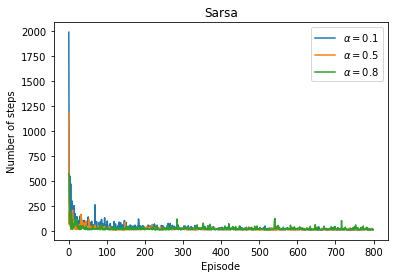

In [5]:
plot_step_per_ep(eps1, '$\\alpha=0.1$',eps2, '$\\alpha=0.5$',eps3, '$\\alpha=0.8$', 'Sarsa')

## Q-learning

## Sarsa-Lambda

## Q-Lambda

# Regular Gridworld

## Sarsa

## Q-learning

## Sarsa-Lambda

## Q-Lambda